# Data Science Mathematics
# Statistical Inference
# In-Class Activity

Instructions: Solve each problem. Show all work.

Problem Context: You are a data scientist developing an algorithm for Russian event detection on Twitter, and are testing your algorithm using the 2018 Russian election as your test event.  You are interested in discursive similarity over time (proceeding by argument or reasoning rather than by intuition)– the day-to-day similarity of discussion topics – within a target group of Twitter users.  You assume that, given the amount of “noise” on Twitter (e.g., the high variability of topics discussed on any ordinary day), your similarity metric will be near zero.  However, if a significant event occurs that becomes a hot topic of discussion, you hypothesize that your similarity metric will significantly increase for that given timeframe.  You have collected discursive similarity data that bracket the test event, and want to determine if an anomaly has occurred on the date of the Russian election, 18 March 2018.

Consider the Excel data set on github/Blackboard.  You will solve this by hand, as well as using Python.  When solving by hand, you may use Excel to calculate any descriptive statistics.  To infer any statistically significant difference from a specified value, the t-statistic can be calculated as follows:

$$t = \frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}$$

Where $s$ is the sample standard deviation, $\mu_0$ is the specified value, $n$ is the sample size, and $\bar{x}$ is the sample mean.

**a)** What is your null hypothesis?  Explain what rejection of the null hypothesis means in terms of statistical inference.

**Response** Our Null Hypothesis $H_0$ is "The sample mean of the similarity metric of the collected discursive similarity data that brackets the test event at given timeframe is equal to the population mean of the similarity metric of the test event (i.e., an anomaly has occurred on the date of the Russian election, 18 March 2018.)

In terms of statistical inference, the rejection of our null hypothesis means that the extreme observation of the test event (i.e., an anomaly occurred on the date of the Russian election, 18 March 2018) is just due to chance, or its occurrence probability is less than or equal to the level of confidence, $\alpha$, which is typically set to $5\%$.

**b)** Are you able to detect an anomalous event on 18 March 2018, given the above data set, and assuming a type I error rate of $5%$?  Explain why or why not.

**Response** No, I am unable to detect an anomalous event on 18 March 2018 with the given data set at type I error rate of $5\%$.  This is because the frequency of non-test-event (i.e., the day-to-day discussion topics on any ordinary day) is much larger than that of the test-event (i.e. a hot topic of discussion such as Russian election), and consequently the contribution/influence of much larger similarity metrics of the rather rare test events to both mean and standard deviation of the distribution will be washed away by the much larger frequency of the non-test-events.

**c)** Find the p-value using Python (see Python notebook for this exercise).  Do you reject your hypothesis based on the calculated p-value?

**Response** Yes, we will reject the null hypothesis because the calculated p-value is eseentially equal to 0, thus it is much smaller than the type I error rate of $5\%$.  In plain words, this method of t-test does not help us detect the existence of an anomalous event known to occur on 18 March 2018.

**d)** Calculate by hand again assuming a type I error rate of 1%.  What happens to the critical value of t?  Intuitively, why is this the case?  Does this change impact your conclusion?

Let's calculate a p-value for our data set.  First, let's import the relevant libraries.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot

Now, let's import our data set.  You need to specify the absolute path of the data set (Dataset_Session5.csv).

We can visualize similarity metrics data as a histogram, which groups values into bins, and its frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

The histogram chart shows two deparate parts:
 - one part has a dominating portion of our similarity metric data nearing zeroes, or smaller than 0.1, and
 - another part has two data points with significantly increased magnitude of similarity metric at close to 0.8 or higher , suggesting a occurrence of significant event that becomes a hot topic of discussion at certain timeframe.

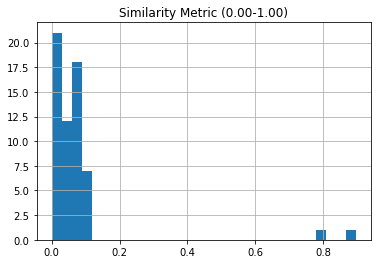

In [2]:
dataset = r'Dataset_Session5.csv' #Specify absolute path here.
data = pd.read_csv(dataset)
# print(data)
# Visualize similarity metrics data
data.hist(bins=30)
pyplot.show()

Now, let's get the data we want in the correct format: a Numpy array.

In [3]:
data_series = np.array(list(data['Similarity Metric (0.00-1.00)']))
print(data_series)

[6.140e-02 9.130e-02 3.680e-02 2.130e-02 9.800e-03 1.610e-02 4.840e-02
 3.940e-02 5.610e-02 1.000e-01 6.830e-02 8.730e-02 6.270e-02 6.670e-02
 5.720e-02 5.310e-02 1.490e-02 3.810e-02 6.220e-02 9.620e-02 7.740e-02
 7.600e-02 1.220e-02 6.950e-02 1.830e-02 4.270e-02 8.440e-02 3.700e-03
 8.965e-01 7.814e-01 1.480e-02 7.430e-02 7.620e-02 8.510e-02 8.680e-02
 8.590e-02 2.210e-02 4.120e-02 1.390e-02 1.760e-02 7.000e-04 2.230e-02
 7.530e-02 5.250e-02 3.050e-02 1.560e-02 3.590e-02 1.420e-02 9.230e-02
 9.160e-02 9.250e-02 2.950e-02 8.510e-02 9.050e-02 3.970e-02 6.470e-02
 1.740e-02 4.300e-03 1.190e-02 1.300e-02]


Now we can calculate some descriptive statistics.

In [22]:
#mean and standard deviation
m = np.average(data_series)
sd = np.std(data_series)
print('average = ', m)
print('stdev   = ', sd)

average =  0.07577999999999999
stdev   =  0.14518890774895077


Now print the values in the cell below:

At first glance, does it look like our value on 18 March 2018 is much different from the mean?  Yes, it does.

We know that on 18 March 2018, our value is 0.8965.  We are performing a one-sample t-test in this case to see if our value at that date is anomalous.  We will take that sample to be the "population mean," in this case. 

In [24]:
pop_mean = 0.8965

So let's calculate our t statistic and our two-tailed p-value.

In [25]:
t, p = stats.ttest_1samp(data_series, pop_mean, axis=0)
# print(t, p)

Now let's print our results.

In [26]:
t_str = "t statistic: {}".format(t)
p_str = "p-value    : {}".format(p)
print(t_str)
print(p_str)

t statistic: -43.41977659265283
p-value    : 1.749492641970814e-46


Do we reject the null hypothesis?

**Response:** Yes, we will rejet the null hypothesis because its p-value is less than the level of confidence, $5\%$. We will rejet the null hypothesis at the $1\%$ level of confidence as well because its p-value is essentially equal to $0$. 

We remark that this anonamous event at that date(s) could be easily detected (or clustered into one cluster) from applying the k-means algorithm developed from last class activity.

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.